In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### importing data

In [2]:
# read data
df_train = pd.read_csv('../data/raw/neurips-open-polymer-prediction-2025/train.csv')
df_test = pd.read_csv('../data/raw/neurips-open-polymer-prediction-2025/test.csv')
print(f'Train shape: {df_train.shape}')
print(f'Test shape: {df_test.shape}')

Train shape: (7973, 7)
Test shape: (3, 2)


In [3]:
df_train.head()

,id,SMILES,Tg,FFV,Tc,Density,Rg
0,87817,*CC(*)c1ccccc1C(=O)OCCCCCC,NaN,0.374645,0.205667,NaN,NaN
1,106919,*Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...,NaN,0.370410,NaN,NaN,NaN
2,388772,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...,NaN,0.378860,NaN,NaN,NaN
3,519416,*Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)...,NaN,0.387324,NaN,NaN,NaN
4,539187,*Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N...,NaN,0.355470,NaN,NaN,NaN


In [4]:
df_test

,id,SMILES
0,1109053969,*Oc1ccc(C=NN=Cc2ccc(Oc3ccc(C(c4ccc(*)cc4)(C(F)...
1,1422188626,*Oc1ccc(C(C)(C)c2ccc(Oc3ccc(C(=O)c4cccc(C(=O)c...
2,2032016830,*c1cccc(OCCCCCCCCOc2cccc(N3C(=O)c4ccc(-c5cccc6...


### getting information about the target properties' values

In [5]:
properties_names = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']

In [6]:
# basic statistics
df_train[properties_names].describe()

,Tg,FFV,Tc,Density,Rg
count,511.000000,7030.000000,737.000000,613.000000,614.000000
mean,96.452314,0.367212,0.256334,0.985484,16.419787
std,111.228279,0.029609,0.089538,0.146189,4.608640
min,-148.029738,0.226992,0.046500,0.748691,9.728355
25%,13.674509,0.349549,0.186000,0.890243,12.540328
50%,74.040183,0.364264,0.236000,0.948193,15.052194
75%,161.147595,0.380790,0.330500,1.062096,20.411067
max,472.250000,0.777097,0.524000,1.840999,34.672906


In [8]:
# information about missing datapoints for each property
df_missing_info = pd.DataFrame()
df_missing_info.index.name = ''
for property in properties_names:
    df_missing_info[property] = df_train[property].isna().value_counts()
df_missing_info

,Tg,FFV,Tc,Density,Rg
,,,,,
True,7462,943,7236,7360,7359
False,511,7030,737,613,614


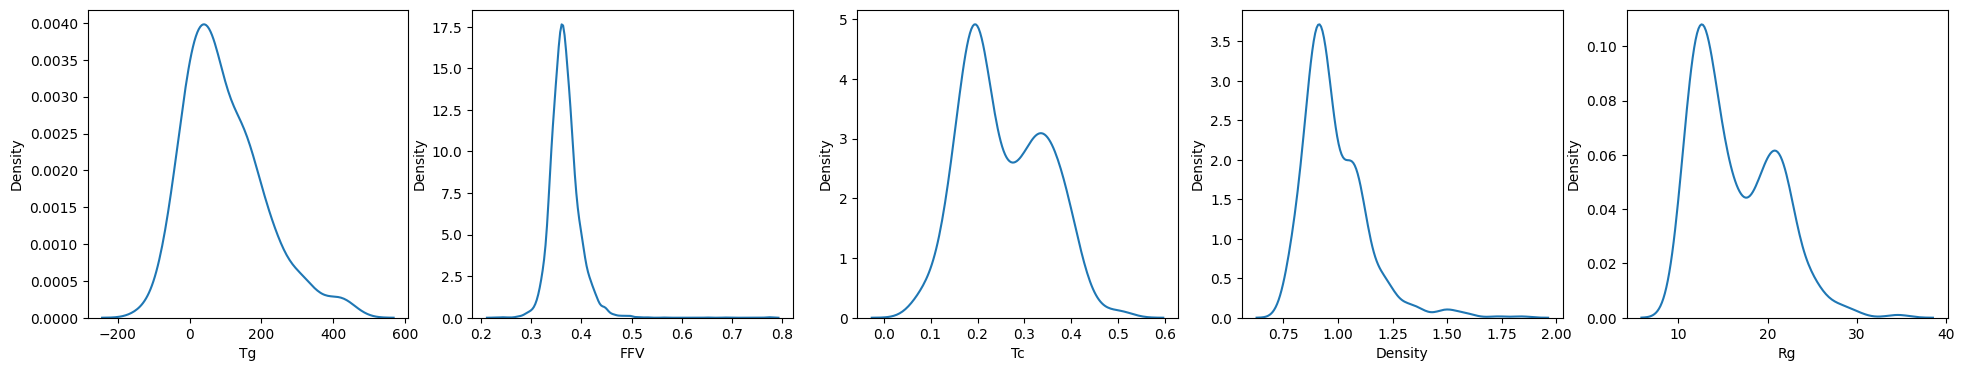

In [ ]:
# visualize the different properties distributions
fig, axs = plt.subplots(ncols = 5, figsize = (24,4))
for i, property in enumerate(properties_names):
    sns.kdeplot(df_train, x = property, ax = axs[i])